In [4]:
import pandas as pd
import pickle

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import sys
sys.path.insert(0, './../../preprocessing')

In [7]:
import session as ss

In [8]:
def load_data():
    t = pickle.load( open( "./../../data_set.p", "rb" ) )
    t = t[t['action_cleaned'] != 'click_on_other']
    t = ss.define_session(t)
    return t

In [9]:
df = load_data()

3465876


In [10]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [11]:
sessions = []
for uuid, row in df.groupby('UUID'):
    session = []
    for a in row['action_cleaned']:
        session.append(a)
    sessions.append(session)

total_examples = len(sessions)
print('num sessions', total_examples)
print('total num events',len(df)) 

num sessions 199991
total num events 3465876


In [12]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
dictionary = corpora.Dictionary(sessions)
dictionary.save('dictionary.dict')
print(dictionary)

Dictionary(213 unique tokens: ['click_on_navicon', 'click_on_number_details', 'click_on_select', 'click_on_surf_datapakke', 'load_other_page']...)


In [13]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in sessions]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

199991
[(16, 1), (36, 1), (37, 9), (48, 2), (94, 1)]


In [52]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(corpus=doc_term_matrix, num_topics=6, id2word=dictionary, passes=50)
print('used: {:.2f}s'.format(time()-start))

used: 1766.25s


In [13]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(3, '0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail"'), (12, '0.543*"click_on_name" + 0.216*"click_on_subscription" + 0.094*"load_homepage" + 0.040*"click_on_menu_accounts"')]


In [14]:
for i in ldamodel.print_topics(): 
    for j in i: print(j)

0
0.398*"click_on_save" + 0.250*"click_on_edit_field" + 0.103*"click_on_number_details" + 0.073*"click_on_MBN_sub" + 0.043*"click_on_new_settings" + 0.033*"click_on_user_type" + 0.031*"click_on_find_person" + 0.028*"load_other_page" + 0.022*"click_on_cancel" + 0.014*"click_on_reference"
1
0.306*"open_invoice_account" + 0.129*"click_on_number_details" + 0.123*"click_on_company" + 0.085*"click_on_menu_subscriptions" + 0.054*"click_on_confirm" + 0.043*"click_on_get_report" + 0.041*"load_homepage" + 0.040*"click_on_new_report" + 0.033*"scroll_on_reports_page" + 0.031*"load_other_page"
2
0.260*"click_on_change_account" + 0.246*"click_on_arrow" + 0.085*"click_on_activate" + 0.081*"click_on_number_details" + 0.075*"activate_new" + 0.052*"click_on_sim_card" + 0.040*"load_homepage" + 0.029*"click_on_add" + 0.026*"loading subscriptions" + 0.025*"click_on_navicon"
3
0.440*"search" + 0.243*"click_on_number_details" + 0.092*"click_on_terminate" + 0.092*"click_on_subscription_detail" + 0.080*"load_h

In [53]:
ldamodel.save('6_topics/topic.model')

In [41]:
from gensim.models import LdaModel
loading = LdaModel.load('10_topics/topic.model')

In [23]:
print(loading.print_topics(num_topics=2, num_words=4))

[(2, '0.297*"click_log_out" + 0.184*"load_homepage" + 0.112*"click_on_confirm" + 0.097*"account_reference"'), (1, '0.114*"go_back_to_homepage" + 0.107*"click_on_agreements" + 0.085*"adding_additional_services" + 0.073*"load_homepage"')]


In [1]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

/home/aksel/anaconda3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [24]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('14_topics/topic.model')

In [25]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

/home/aksel/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.070914 -0.315781       1        1  11.867522
2      0.143005  0.070281       2        1  11.103481
0      0.188149  0.128495       3        1   9.955438
7      0.120358  0.012557       4        1   9.233495
5     -0.116256  0.133969       5        1   8.619533
10    -0.100500 -0.080209       6        1   8.126553
11    -0.214813 -0.170520       7        1   7.694080
13     0.278909 -0.062705       8        1   7.601864
3      0.098343 -0.095960       9        1   7.012669
12    -0.003139  0.065471      10        1   5.177390
6      0.153181 -0.109229      11        1   4.125314
8     -0.205263  0.221389      12        1   3.692177
9      0.004542  0.206310      13        1   3.454947
4     -0.275602 -0.004069      14        1   2.335537, topic_info=     Category           Freq                                 Term  \
term                                                                
5     Default  397180.000000                   scroll_on_homepage   
37    Default  192750.000000          interact_with_pop_up_window   
6     Default  205135.000000                               search   
21    Default  184238.000000                click_on_subscription   
43    Default   84882.000000               empty_subselect_ignore   
15    Default  156970.000000                        click_on_name   
7     Default   77122.000000                        click_log_out   
67    Default   87532.000000           click_next_in_subscr_order   
1     Default  273419.000000              click_on_number_details   
40    Default   77608.000000                         submit_order   
13    Default   53836.000000                       click_on_arrow   
22    Default   46190.000000                   click_on_terminate   
72    Default   66564.000000                        click_on_save   
17    Default   70925.000000                 open_invoice_account   
4     Default   48623.000000                      load_other_page   
9     Default   71701.000000                     click_on_confirm   
86    Default   30477.000000                    account_reference   
16    Default  198891.000000                        load_homepage   
11    Default   42940.000000         click_on_subscription_detail   
25    Default   36426.000000                  click_on_agreements   
31    Default   23010.000000                 click_on_bedrift_sub   
76    Default   33660.000000            click_on_new_subscription   
28    Default   60216.000000                  go_back_to_homepage   
49    Default   23167.000000                     click_on_MBN_sub   
60    Default   30533.000000           adding_additional_services   
23    Default   23722.000000                           start_chat   
33    Default   27837.000000                     click_on_company   
12    Default   43059.000000                loading subscriptions   
36    Default   22865.000000                        click_on_send   
39    Default   41176.000000                  click_on_edit_field   
...       ...            ...                                  ...   
56    Topic14    3937.657227           click_on_subscription_type   
46    Topic14    3863.502441    click_on_change_account_reference   
116   Topic14    2918.574707                   click_on_configure   
47    Topic14    2689.668701                click_on_other_change   
125   Topic14    2171.186279             click_on_send_entry_code   
115   Topic14    1617.480957  click_on_locations_of subscriptions   
149   Topic14    1454.951294                      click_on_update   
142   Topic14    1448.460449                      click_on_change   
135   Topic14    1252.579224        click_on_terms_and_conditions   
90    Topic14    1028.510742                  click_on_magic_link   
95    Topic14     915.225952      click_whether_you_can_get_fiber   
139   Topic14     794.591003                     click_on

In [33]:
pyLDAvis.save_html(data,'vis.html')

In [8]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('./11_topics/topic.model')

CPU times: user 2.03 ms, sys: 74 µs, total: 2.1 ms
Wall time: 1.57 ms


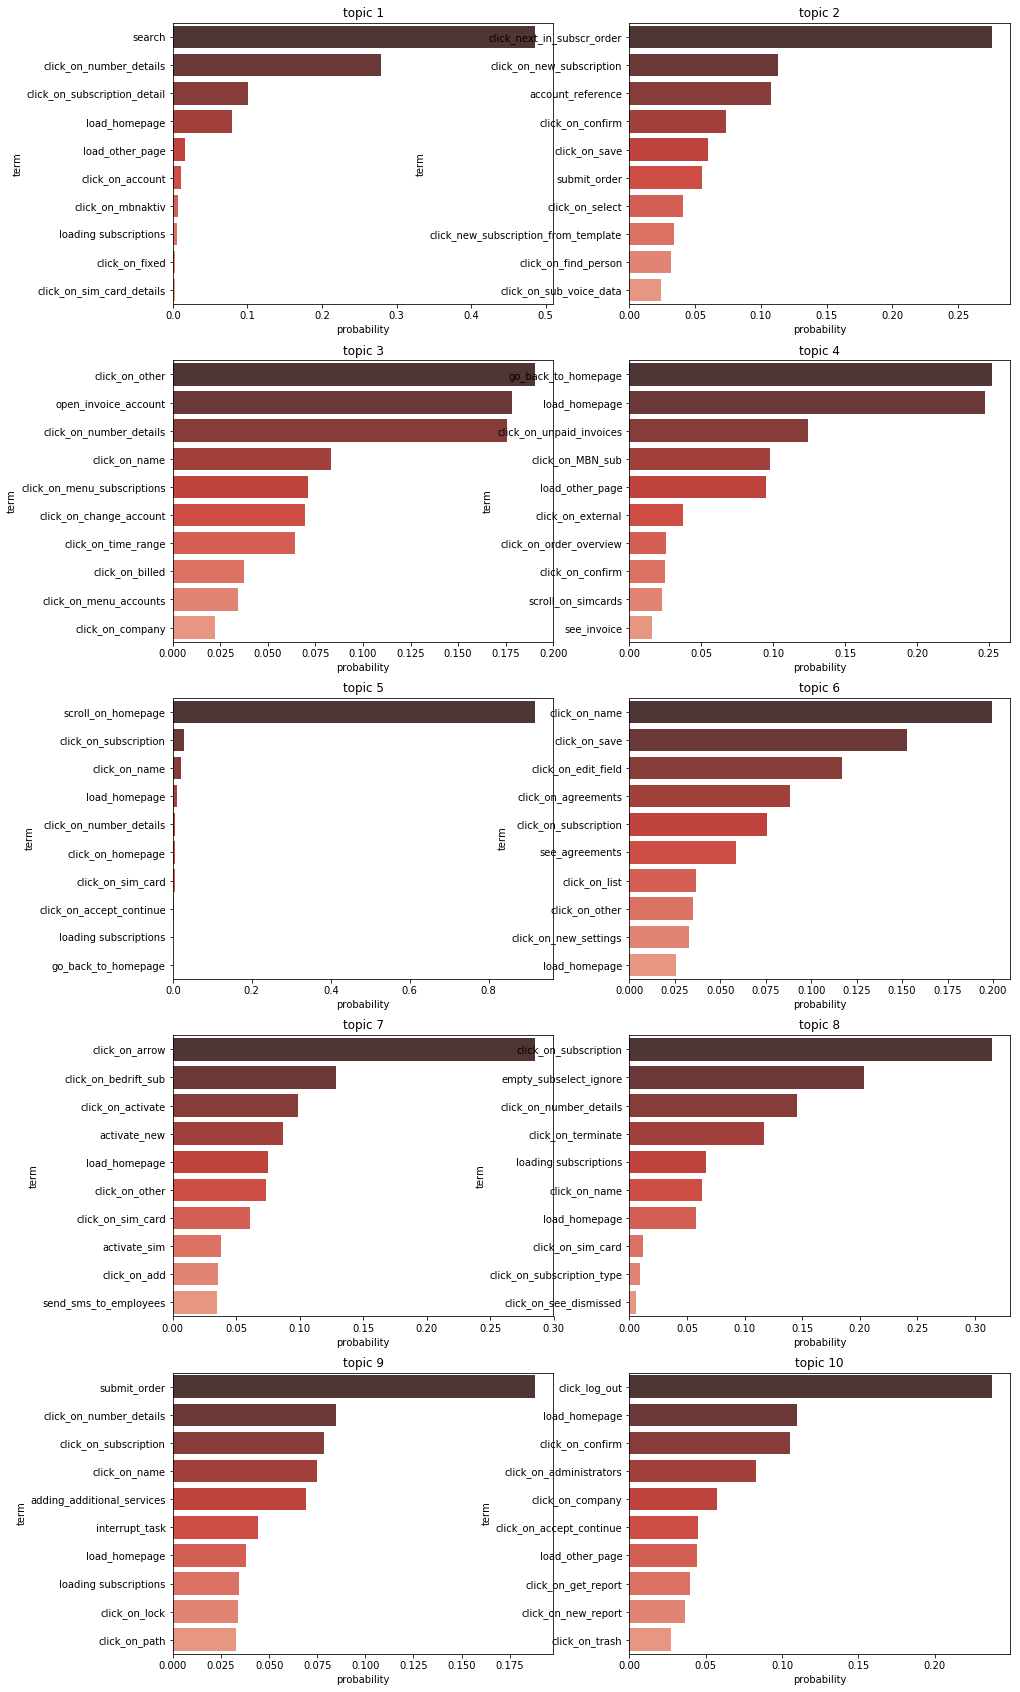

In [9]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    # df=df.sort_values('prob')
    
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    
plt.show()

In [14]:
import os

def makedir(path):
    current_directory = os.getcwd()
    final_directory = os.path.join(current_directory, r'{path}'.format(path=path))
    if not os.path.exists(final_directory): 
        os.makedirs(final_directory)


In [28]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pickle

In [34]:
def lda_and_coherence(dictionary, corpus, texts, limit=24, start=2, step=1):
    
    coherence_values_cv = {}
    coherence_values_u_mass = {}
    for num_topics in range(start, limit, step):
        
        # train lda model
        lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=50)
        
        # save lda model 
        makedir('{0}_topics'.format(num_topics))
        lda_model.save('{0}_topics/topic.model'.format(num_topics))

        # compute coherence score using c_v
        coherence_model_cv = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_cv = coherence_model_cv.get_coherence()
        coherence_values_cv[num_topics] = coherence_cv
        
        # compute coherence score using UMass
        coherence_model_umass = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_umass = coherence_model_umass.get_coherence()
        coherence_values_u_mass[num_topics] = coherence_umass
    
    return coherence_values_cv, coherence_values_u_mass

In [35]:
coherence_values_cv, coherence_values_u_mass = lda_and_coherence(dictionary=dictionary, corpus=doc_term_matrix, texts=sessions, limit=24)
dicts = {'coherence_values_cv': coherence_values_cv, 'coherence_values_u_mass': coherence_values_u_mass}

with open('coherence.p', 'wb') as f:
    pickle.dump(dicts, f)


In [36]:
import matplotlib.pyplot as plt

with open('coherence.p', 'rb') as f:
    dicts = pickle.load(f)

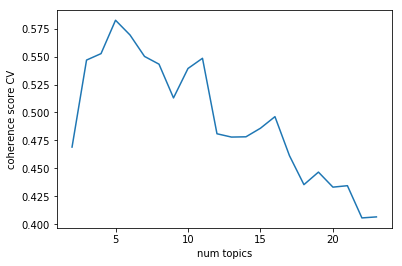

{2: 0.4690539314762131,
 3: 0.5468460514480534,
 4: 0.5526113536440561,
 5: 0.5824545082764876,
 6: 0.5692702678605766,
 7: 0.5501128906091882,
 8: 0.5431852478298269,
 9: 0.5130154523848035,
 10: 0.5393269170443495,
 11: 0.5484479830539448,
 12: 0.480962016764308,
 13: 0.4780048552784937,
 14: 0.47825126833567716,
 15: 0.48590962260226156,
 16: 0.49626234090165977,
 17: 0.4614026858113094,
 18: 0.43547935433019713,
 19: 0.44668451477843607,
 20: 0.433245423243594,
 21: 0.43453370400287417,
 22: 0.40573084124334213,
 23: 0.4066407338427385}

In [62]:
coherence_vals_cv = dicts['coherence_values_cv']
x = coherence_vals_cv.keys()
y = coherence_vals_cv.values()
plt.plot(x,y)
plt.xlabel('num topics')
plt.ylabel('coherence score CV')
plt.show()
coherence_vals_cv

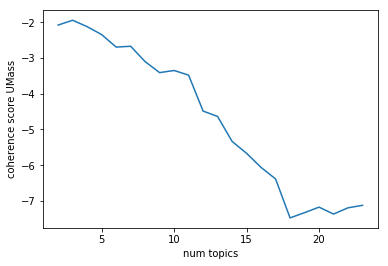

{2: -2.076872282962595,
 3: -1.9424748444609783,
 4: -2.1230288525781056,
 5: -2.3437166498919426,
 6: -2.693608227764356,
 7: -2.670608100348573,
 8: -3.1006511286056186,
 9: -3.4081796301036285,
 10: -3.3488939494898675,
 11: -3.479338468887184,
 12: -4.484366225704055,
 13: -4.635792739170705,
 14: -5.333708750619728,
 15: -5.667415858650385,
 16: -6.0619241546278015,
 17: -6.383956713648437,
 18: -7.475073861454015,
 19: -7.327314632619924,
 20: -7.173310002350222,
 21: -7.3674070846426805,
 22: -7.191717495208237,
 23: -7.1227904304972025}

In [71]:
coherence_vals_umass = dicts['coherence_values_u_mass']
x=coherence_vals_umass.keys()
y=coherence_vals_umass.values()
plt.plot(x,y)
plt.xlabel('num topics')
plt.ylabel('coherence score UMass')
plt.show()
coherence_vals_umass

In [ ]:
overlaps = [0,0,1,2,1,7,3,5,3,11,4,8,3,]